In [144]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

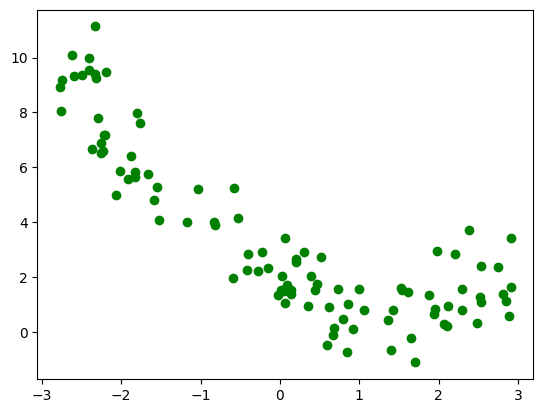

In [145]:
X = 6 * np.random.rand(100 , 1) - 3
y = 0.5 * X**2 - 1.5* X + 2 +np.random.randn(100 , 1)
# Quadratic Equation used  
plt.scatter(X, y , color = 'green')

In [146]:
print(X.shape , y.shape)

(100, 1) (100, 1)


In [147]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y, test_size=0.25 , random_state=42)


In [148]:
from sklearn.linear_model import  LinearRegression
regression_1 = LinearRegression()

In [149]:
print(X_train.shape, y_train.shape)  # Both shapes should match in number of rows
regression_1.fit(X_train, y_train)  # Now try fitting again


(75, 1) (75, 1)


LinearRegression()

In [150]:
from sklearn.metrics import r2_score
score  = r2_score(y_test , regression_1.predict(X_test))
score

0.725397453016765

Text(0, 0.5, 'y')

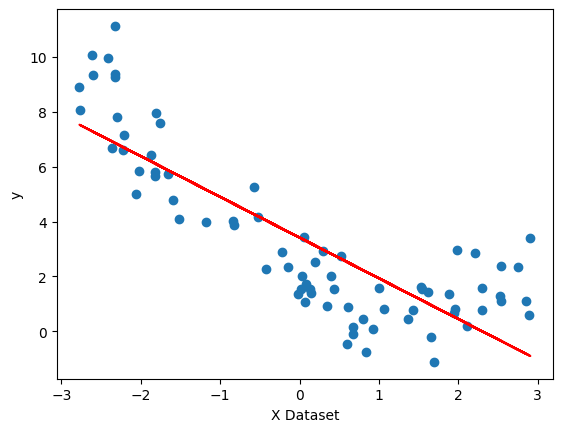

In [151]:
plt.plot(X_train , regression_1.predict(X_train) , color = 'r')
plt.scatter(X_train , y_train)
plt.xlabel("X Dataset")
plt.ylabel("y")

In [152]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree= 2 , include_bias= True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [153]:
X_train_poly

array([[ 1.00000000e+00,  1.99354115e-01,  3.97420633e-02],
       [ 1.00000000e+00, -2.22381510e+00,  4.94535358e+00],
       [ 1.00000000e+00,  2.53685629e+00,  6.43563986e+00],
       [ 1.00000000e+00,  1.97721687e+00,  3.90938657e+00],
       [ 1.00000000e+00, -2.29743937e+00,  5.27822767e+00],
       [ 1.00000000e+00,  1.96091698e+00,  3.84519541e+00],
       [ 1.00000000e+00, -4.17674464e-01,  1.74451958e-01],
       [ 1.00000000e+00,  2.30068925e+00,  5.29317104e+00],
       [ 1.00000000e+00,  7.97872992e-01,  6.36601312e-01],
       [ 1.00000000e+00, -2.61510609e+00,  6.83877989e+00],
       [ 1.00000000e+00,  1.40963518e-01,  1.98707134e-02],
       [ 1.00000000e+00, -2.14587455e-02,  4.60477759e-04],
       [ 1.00000000e+00, -2.41146548e+00,  5.81516575e+00],
       [ 1.00000000e+00,  1.65238838e+00,  2.73038737e+00],
       [ 1.00000000e+00,  8.41023141e-01,  7.07319924e-01],
       [ 1.00000000e+00, -1.82289901e+00,  3.32296080e+00],
       [ 1.00000000e+00, -2.60029128e+00

In [154]:
X_test_poly

array([[ 1.00000000e+00,  8.59893662e-01,  7.39417110e-01],
       [ 1.00000000e+00,  2.48651348e+00,  6.18274928e+00],
       [ 1.00000000e+00, -1.02656345e+00,  1.05383251e+00],
       [ 1.00000000e+00,  1.97467935e-01,  3.89935852e-02],
       [ 1.00000000e+00, -2.41078379e+00,  5.81187847e+00],
       [ 1.00000000e+00, -2.74908527e+00,  7.55746984e+00],
       [ 1.00000000e+00,  2.91011961e+00,  8.46879614e+00],
       [ 1.00000000e+00,  2.81395041e+00,  7.91831693e+00],
       [ 1.00000000e+00, -2.24951509e+00,  5.06031816e+00],
       [ 1.00000000e+00,  2.11695732e+00,  4.48150831e+00],
       [ 1.00000000e+00,  1.39467633e+00,  1.94512207e+00],
       [ 1.00000000e+00,  7.27497616e-01,  5.29252781e-01],
       [ 1.00000000e+00,  2.38707658e+00,  5.69813460e+00],
       [ 1.00000000e+00, -1.90867840e+00,  3.64305324e+00],
       [ 1.00000000e+00,  2.07171417e+00,  4.29199958e+00],
       [ 1.00000000e+00, -2.49215973e+00,  6.21086010e+00],
       [ 1.00000000e+00,  4.73919330e-01

In [155]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly , y_train)
y_pred  = regression.predict(X_test_poly)
score = r2_score(y_test , y_pred)
print(score)


0.9075341562743742


In [156]:
print(regression.coef_)

[[ 0.         -1.47261888  0.5060325 ]]


Text(0, 0.5, 'y')

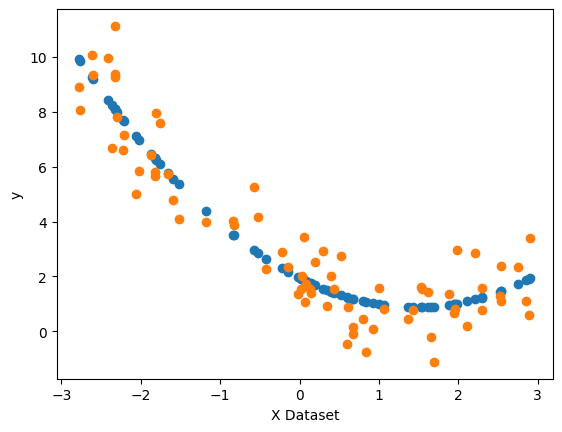

In [157]:
plt.scatter(X_train , regression.predict(X_train_poly))
plt.scatter(X_train , y_train)
plt.xlabel("X Dataset")
plt.ylabel("y")